# AIED - Uczenie maszynowe

Fraud detection - transakcje bankowe

Dla zbioru danych `creditcard.csv` nie udało się zapewnić stopy błędów FPR na poziomie poniżej 0.5% w żadnym przypadku analizy. Zamiast tego analiza skupiała się na jej minimalizowaniu i jednoczesnym utrzymywaniu stopy błędów FNR na jak najniższym poziomie.

## Dane wejściowe - wczytanie i analiza


In [14]:
import pandas as pd

dataframe = pd.read_csv("./data/creditcard.csv")


### Rozmiar danych wejściowych i podstawowe statystyki


In [15]:
dataframe.shape


(284807, 31)

In [16]:
dataframe.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
dataframe['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

### Standaryzacja danych

Usunięcie średniej i normalizacja odchylenia standardowego. Kolumny klasy i czasu nie są standaryzowane.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
featureCols = dataframe.columns.difference(['Class'], sort=False)
dataframe[featureCols] = scaler.fit_transform(dataframe[featureCols])
print("std:", dataframe[featureCols].stack().std())
print("mean:", dataframe[featureCols].stack().mean())
dataframe


std: 1.000000058519166
mean: -4.657000846487342e-19


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


##### Usunięcie duplikatów

In [19]:
dataframe.drop_duplicates(keep='first', inplace=True)
dataframe.shape


(283726, 31)

### Podział na klasy terningowe i testowe

In [20]:
from sklearn.model_selection import train_test_split

X = dataframe.drop(['Class'], axis=1)
y = dataframe.Class

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.20)

print("train rows: {}, test rows: {}".format(
    X_train.shape[0], X_test.shape[0]))  # rows


train rows: 226980, test rows: 56746


## Drzewo decyzyjne

### 1. Wariant podstawowy

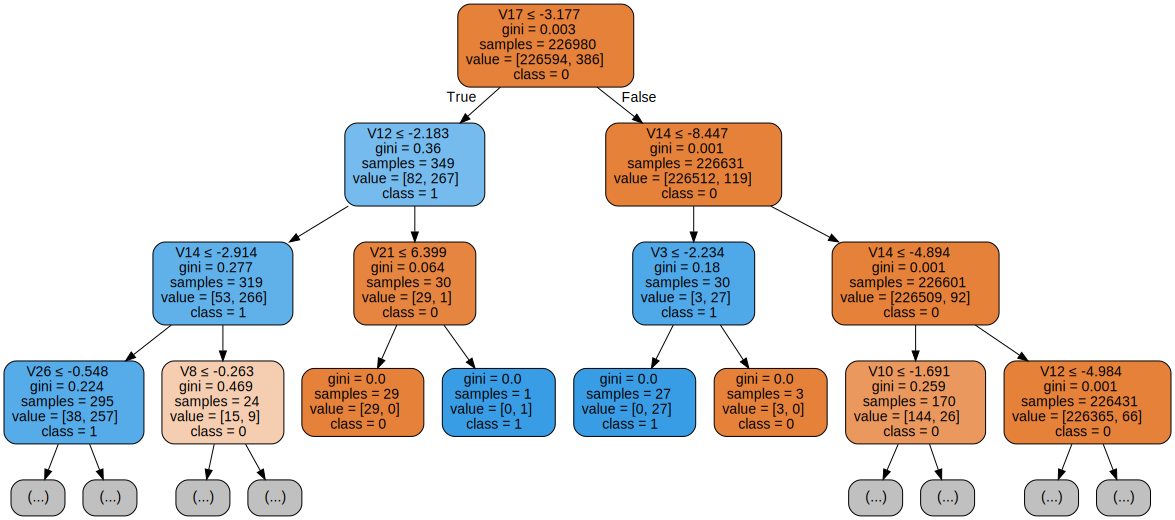

In [21]:
from helpers import computeDecitionTree

y_pred, graph = computeDecitionTree(
    X_train, X_test, y_train)
graph


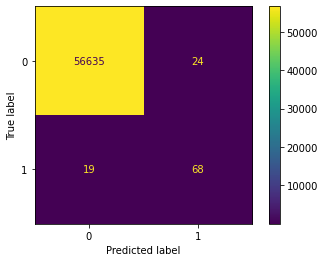

accuracy = 0.9992, sensitivity = 0.7816, specificity = 0.9996


In [22]:
from helpers import analyse
accuracy, sensitivity, specificity = analyse(y_test, y_pred, True)


#### Wnioski
* wysoka dokładność nie oznacza poprawnego działania w przypadku niezbalansowanych danych
* stosunkowo niska czułość (77%) wskazuje na duży odsetek fałszywie negatywnynch klasyfikacji

### 2. Parametry klasyfikatora

##### Głębokość i liczba cech

In [35]:
r = range(1, 24, 4)
depth_sensitivities = []
for depth in r:
    y_pred, graph = computeDecitionTree(
        X_train, X_test, y_train, max_depth=depth)
    accuracy, sensitivity, specificity = analyse(y_test, y_pred)
    depth_sensitivities.append(sensitivity)

features_sensitivities = []
for features in r:
    y_pred, graph = computeDecitionTree(
        X_train, X_test, y_train, max_features=features)
    accuracy, sensitivity, specificity = analyse(y_test, y_pred)
    features_sensitivities.append(sensitivity)


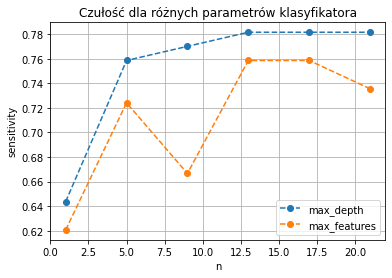

max depth sensitivity: 0.7816091954022989, max features sensitivity: 0.7586206896551724


In [36]:
import matplotlib.pyplot as plt
import numpy as np

plot_style = {"marker": 'o', "linestyle": '--'}

fig, ax = plt.subplots()

ax.plot(r, depth_sensitivities, label="max_depth", **plot_style)
ax.plot(r, features_sensitivities, label="max_features", **plot_style)

ax.set(xlabel='n', ylabel='sensitivity',
       title='Czułość dla różnych parametrów klasyfikatora')
ax.grid()
ax.legend()

plt.show()
print("max depth sensitivity: {}, max features sensitivity: {}".format(
    max(depth_sensitivities), max(features_sensitivities)))


##### Kryterium podziału

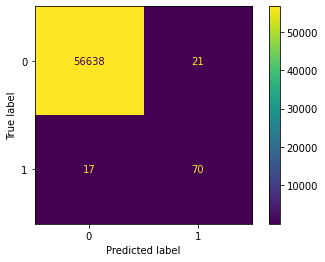

accuracy = 0.9993, sensitivity = 0.8046, specificity = 0.9996


In [37]:
y_pred, graph = computeDecitionTree(
    X_train, X_test, y_train, criterion='entropy')
accuracy, sensitivity, specificity = analyse(y_test, y_pred, True)


#### Wnioski

* Parametry klasyfikatora wpływają na jego czułość i zależą bezpośrednio od jego typu
* Dla przykładu kart kredytowych wartość parametrów głębokości i liczby cech dających największą czułość to 13. Potem czułość klasyfikatora stabilizuje się na określonynm poziomie.
* Ręczne ustawienie parametrów daje porównywalną czułość, jak ustawienia i optymalizacje domyślne (80% vs 78%).
* Zmiana kryterium na entropię delikatnie pomaga zwiekszyć czułość

### 3. Selekcja cech - ANOVA

In [38]:
from sklearn.feature_selection import SelectPercentile, f_classif
select = SelectPercentile(f_classif, percentile=10).fit(X, y)

X_anova = pd.DataFrame(select.transform(X))
X_anova.columns = select.get_feature_names_out()

X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(
    X_anova, y, random_state=331, test_size=0.33)

print("train rows: {}, test rows: {}".format(
    X_train_anova.shape[0], X_test_anova.shape[0]))  # rows


train rows: 190096, test rows: 93630


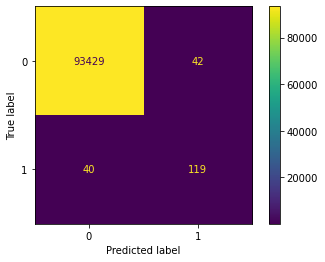

accuracy = 0.9991, sensitivity = 0.7484, specificity = 0.9996


In [39]:
y_pred_anova, graph = computeDecitionTree(
    X_train_anova, X_test_anova, y_train_anova)

accuracy, sensitivity, specificity = analyse(y_test_anova, y_pred_anova, True)


#### Wnioski

* Selekcja cech, w przypadku drzewa decyzyjnego nie wpływa znacząco na czułość klasyfikatora, ponieważ drzewo samo w sobie przeprowadza optymlizację zgodnie z kryterium gini albo entropii. Nawet może prowadzić do zmniejszenia czułości klasyfikatora.

### 4. Problem niezbalansowanych klas

#### Oversampling - SMOTE

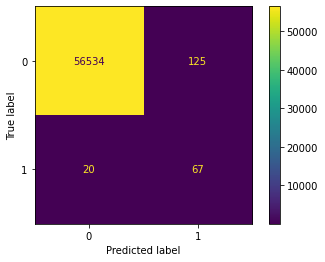

accuracy = 0.9974, sensitivity = 0.7701, specificity = 0.9978


(0.9974447538152469, 0.7701149425287356, 0.9977938191637692)

In [40]:
from imblearn.over_sampling import SMOTE

X_train_smote, y_train_smote = SMOTE(random_state=0).fit_resample(X_train, y_train)

y_pred_smote, graph = computeDecitionTree(
    X_train_smote, X_test, y_train_smote)
analyse(y_test, y_pred_smote, True)


#### Oversampling - SVMSMOTE

In [41]:
""" from imblearn.over_sampling import  SVMSMOTE

X_train_smote, y_train_smote = SVMSMOTE().fit_resample(X_train, y_train)

y_pred_smote, graph = computeDecitionTree(
    X_train_smote, X_test, y_train_smote)
analyse(y_test, y_pred_smote, True) """


' from imblearn.over_sampling import  SVMSMOTE\n\nX_train_smote, y_train_smote = SVMSMOTE().fit_resample(X_train, y_train)\n\ny_pred_smote, graph = computeDecitionTree(\n    X_train_smote, X_test, y_train_smote)\nanalyse(y_test, y_pred_smote, True) '

#### Oversampling - ADASYN

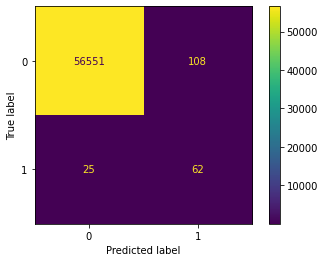

accuracy = 0.9977, sensitivity = 0.7126, specificity = 0.9981


(0.9976562224650196, 0.7126436781609196, 0.9980938597574966)

In [42]:
from imblearn.over_sampling import ADASYN

X_train_adasyn, y_train_adasyn = ADASYN(random_state=0).fit_resample(X_train, y_train)

y_pred_adasyn, graph = computeDecitionTree(
    X_train_adasyn, X_test, y_train_adasyn)
analyse(y_test, y_pred_adasyn, True)


#### Undersampling - random

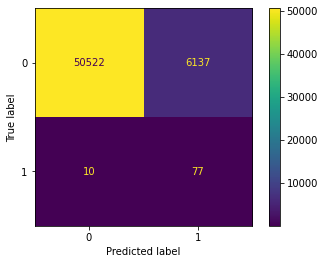

accuracy = 0.8917, sensitivity = 0.8851, specificity = 0.8917


(0.8916751841539492, 0.8850574712643678, 0.8916853456644134)

In [43]:
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)

y_pred_under, graph = computeDecitionTree(
    X_train_under, X_test, y_train_under)
analyse(y_test, y_pred_under, True)


#### Oversampling i undersampling - SMOTEENN

In [44]:
""" from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

y_pred_smoteenn, graph = computeDecitionTree(
    X_train_smoteenn, X_test, y_train_smoteenn)
analyse(y_test, y_pred_smoteenn, True) """


' from imblearn.combine import SMOTEENN\nsmote_enn = SMOTEENN(random_state=0)\nX_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)\n\ny_pred_smoteenn, graph = computeDecitionTree(\n    X_train_smoteenn, X_test, y_train_smoteenn)\nanalyse(y_test, y_pred_smoteenn, True) '

#### Oversampling i undersampling - SMOTETOMEK

In [45]:
""" from imblearn.combine import SMOTETomek
smote_enn = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smote_enn.fit_resample(X_train, y_train)

y_pred_smotetomek, graph = computeDecitionTree(
    X_train_smotetomek, X_test, y_train_smotetomek)
analyse(y_test, y_pred_smotetomek, True) """


' from imblearn.combine import SMOTETomek\nsmote_enn = SMOTETomek(random_state=0)\nX_train_smotetomek, y_train_smotetomek = smote_enn.fit_resample(X_train, y_train)\n\ny_pred_smotetomek, graph = computeDecitionTree(\n    X_train_smotetomek, X_test, y_train_smotetomek)\nanalyse(y_test, y_pred_smotetomek, True) '

#### Wnioski
* Oversampling z użyciem algorytmu SMOTE - syntezy nowych próbek - obniża czułość do ok. 71% względem wariantu podstawowego
* Oversampling z użyciem algorytmu ADASYN - syntezy nowych próbek - obniża czułość do ok. 71% względem wariantu podstawowego
* Oversampling nie wpływa znacznie na specyficzność
* Undersampling z użyciem klastrowania jest zbyt złożony obliczeniowo, żeby prowadzić badania z jego użyciem na tym zbiorze danych
* Unsersampling z użyciem losowego odrzucania próbek znacząco poprawia czułość (88.5%) kosztem znaczącego spadku specyficzności (89%)
* Kombinacje oversamplingu i undersamplingu są zbyt złożone obliczeniowo, żeby prowadzić badania z ich użyciem na tym zbiorze danych
* Operacje resamplingu i ich skuteczność bardzo zależą od podziału danych na testowe i treningowe, szczególnie w przypapdku danych niezbalansowanych


### 5. Niesymetryczne koszty błędów

In [46]:
r = range(1, 10)
sensitivities = []
specificities = []
for weight in r:
    y_pred, graph = computeDecitionTree(
        X_train, X_test, y_train, class_weight={0: 1, 1: weight})
    accuracy, sensitivity, specificity = analyse(y_test, y_pred, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)


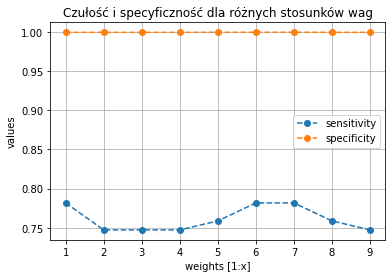

max sensitivity: 0.7816091954022989, max specificity: 0.9996823099595827


In [47]:
fig, ax = plt.subplots()

ax.plot(r, sensitivities, label="sensitivity", **plot_style)
ax.plot(r, specificities, label="specificity", **plot_style)

ax.set(xlabel='weights [1:x]', ylabel='values',
       title='Czułość i specyficzność dla różnych stosunków wag')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))


##### Wnioski
* Manipulacja kosztem błędów pomaga nieznacznie podnieść czułość i nie zmienia specyficzności.
* Zbyt duży stosunek wag klas (np. 0.9999999:0.0000001) może prowadzić do drastycznego zmniejszenia specyficzności.
* W przypadku danych niezbalansowanych, bez wcześniejszej ich obróbki, duże znaczenie dla wyników ma losowy rozdział danych na testowe i treningowe.

### 6. Składanie klasyfikatorów

##### Wariant podstawowy

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


r = range(1, 20, 4)
sensitivities = []
specificities = []
for factor in r:
    clf = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth=1), n_estimators=10 * factor, random_state=0)
    clf.fit(X_train, y_train)
    y_pred_adaboost = clf.predict(X_test)
    accuracy, sensitivity, specificity = analyse(y_test, y_pred_adaboost, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

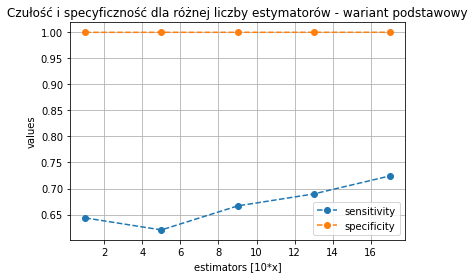

max sensitivity: 0.7241379310344828, max specificity: 0.9997882066397219


In [49]:
fig, ax = plt.subplots()

ax.plot(r, sensitivities, label="sensitivity", **plot_style)
ax.plot(r, specificities, label="specificity", **plot_style)

ax.set(xlabel='estimators [10*x]', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby estymatorów - wariant podstawowy')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))

##### Warianty hybrydowe

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


r = range(1, 40, 4)
sensitivities = []
specificities = []
for factor in r:
    clf = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth=1), n_estimators=10 * factor, random_state=0)
    clf.fit(X_train_under, y_train_under)
    y_pred_adaboost = clf.predict(X_test)
    accuracy, sensitivity, specificity = analyse(y_test, y_pred_adaboost, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)


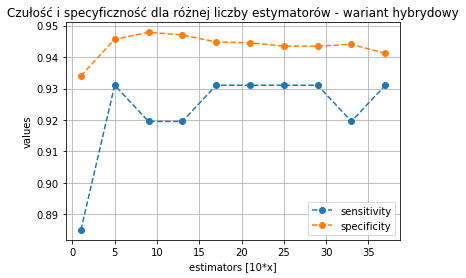

max sensitivity: 0.9310344827586207, max specificity: 0.947881183924884


In [51]:
fig, ax = plt.subplots()

ax.plot(r, sensitivities, label="sensitivity", **plot_style)
ax.plot(r, specificities, label="specificity", **plot_style)

ax.set(xlabel='estimators [10*x]', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby estymatorów - wariant hybrydowy')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


r = range(1, 40, 4)
sensitivities = []
specificities = []
for factor in r:
    clf = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth=1, class_weight={0:1,1:factor}), n_estimators=80, random_state=0)
    clf.fit(X_train_under, y_train_under)
    y_pred_adaboost = clf.predict(X_test)
    accuracy, sensitivity, specificity = analyse(y_test, y_pred_adaboost, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)


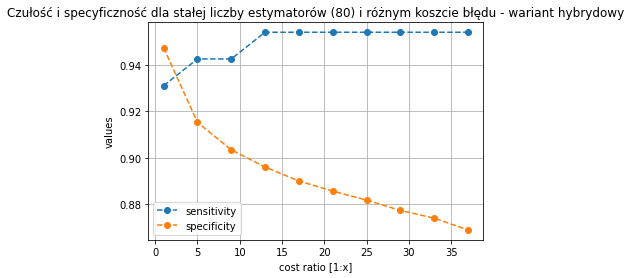

max sensitivity: 0.9540229885057471, max specificity: 0.9473693499708784


In [53]:
fig, ax = plt.subplots()

ax.plot(r, sensitivities, label="sensitivity", **plot_style)
ax.plot(r, specificities, label="specificity", **plot_style)

ax.set(xlabel='cost ratio [1:x]', ylabel='values',
       title='Czułość i specyficzność dla stałej liczby estymatorów (80) i różnym koszcie błędu - wariant hybrydowy')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))

#### Wnioski
* Używając tylko składania klasyfikatorów możmy osiągnąć znaczną poprawę czułości przy zachowaniu wysokiej specyficzności
* Czułość wzrasta wraz ze wzrostem liczby klasyfikatorów, a od pewnego momentu stabilizuje się
* Warianty hybrydowe, stosujące pozostałe techniki, wraz ze składaniem klasyfikatorów pozwalają osiągnąć lepsze rezultaty:
  * wraz z undersamplingiem czułość na poziomie 94% i specyficzność 93% dla 330 klasyfikatorów,
  * wraz z undersamplingiem, stałą liczbą klasyfikatorów (80) dla różnych kosztów błędu czułość rośnie skokowo z ciągłym spadkiem specyficzności;
* AdaBoost znacząco poprawia wyniki klasyfikatora - drzewa decyzyjnego, jednak do pełnego wykorzystania potencjału konieczna jest modyfikacja zbioru uczącego oraz parametrów klasyfikatora

## Multi-layer Perceptron

### 1. Wariant podstawowy

In [54]:
from helpers import computeMLP, analyse
y_pred = computeMLP(X_train, X_test, y_train)

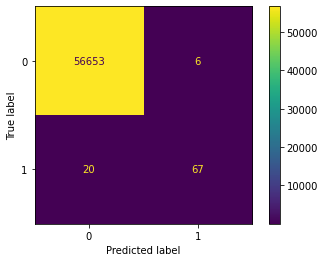

accuracy = 0.9995, sensitivity = 0.7701, specificity = 0.9999


In [55]:
accuracy, sensitivity, specificity = analyse(y_test,y_pred,True)

#### Wnioski
* wysoka dokładność nie oznacza poprawnego działania w przypadku niezbalansowanych danych
* stosunkowo niska czułość (77%) wskazuje na duży odsetek fałszywie negatywnynch klasyfikacji

### 2. Parametry klasyfikatora

In [56]:
import matplotlib.pyplot as plt
import numpy as np
plot_style = {"marker": 'o', "linestyle": '--'}


#### Liczba warstw ukrytych

In [57]:
r = range(1, 10)
num_layers_sensitivities = []
num_layers_specificities = []
for value in r:
    y_pred = computeMLP(
        X_train, X_test, y_train, hidden_layer_sizes=(10,)*value)
    accuracy, sensitivity, specificity = analyse(y_test, y_pred)
    num_layers_sensitivities.append(sensitivity)
    num_layers_specificities.append(specificity)


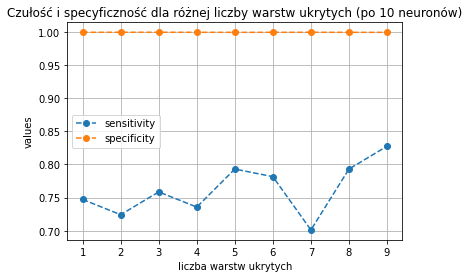

max sensitivity: 0.8275862068965517, max specificity: 0.9998058560864117


In [58]:
fig, ax = plt.subplots()

ax.plot(r, num_layers_sensitivities, label="sensitivity", **plot_style)
ax.plot(r, num_layers_specificities, label="specificity", **plot_style)

ax.set(xlabel='liczba warstw ukrytych', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby warstw ukrytych (po 10 neuronów)')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(num_layers_sensitivities), max(num_layers_specificities)))

#### Liczba neuronów w warstwie ukrytej

In [59]:
r = range(2, 40+1, 4)
num_neurons_sensitivities = []
num_neurons_specificities = []
for value in r:
    y_pred = computeMLP(
        X_train, X_test, y_train, hidden_layer_sizes=(value,))
    accuracy, sensitivity, specificity = analyse(y_test, y_pred)
    num_neurons_sensitivities.append(sensitivity)
    num_neurons_specificities.append(specificity)

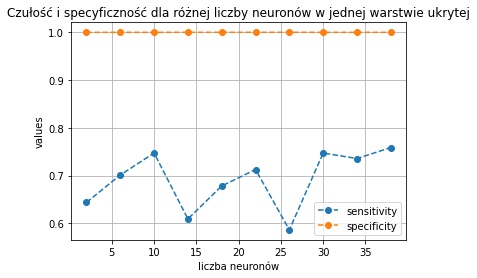

max sensitivity: 0.7586206896551724, max specificity: 0.9999470516599305


In [60]:
fig, ax = plt.subplots()

ax.plot(r, num_neurons_sensitivities, label="sensitivity", **plot_style)
ax.plot(r, num_neurons_specificities, label="specificity", **plot_style)

ax.set(xlabel='liczba neuronów', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby neuronów w jednej warstwie ukrytej')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(num_neurons_sensitivities), max(num_neurons_specificities)))

#### Funkcja aktywacji

In [61]:
from helpers import computeMLP, analyse
activations = ['identity', 'logistic', 'tanh', 'relu']
sensitivities = []
specificities = []
for a in activations:
    y_pred = computeMLP(X_train, X_test, y_train, hidden_layer_sizes=(34,34), activation=a)
    accuracy, sensitivity, specificity = analyse(y_test,y_pred, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

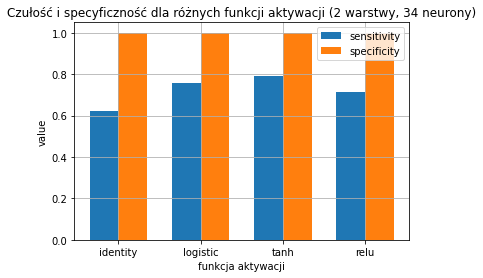

max sensitivity: 0.7931034482758621, max specificity: 0.9999647011066203


In [62]:
fig, ax = plt.subplots()

x = np.arange(len(activations))
width = 0.35

ax.bar(x - width/2, sensitivities, label="sensitivity",width = width)
ax.bar(x + width/2 ,specificities, label="specificity",width = width)

ax.set(xlabel='funkcja aktywacji', ylabel='value', xticks=x, xticklabels=activations,
       title='Czułość i specyficzność dla różnych funkcji aktywacji (2 warstwy, 34 neurony)')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))

##### Wnioski
* zdecydowanie lepsze rezyltaty daje zastosowanie większej już jedna liczby warstw ukrytych,
* wraz ze wzrostem liczby warstw ukrytych czułość rośnie w ogólnym trendzie,
* wraz ze wzorstem liczby neuronów w warstwie ukrytej czułość wzrasta, jednak do pewnego stopnia,
* dla danych standaryzowanych wszystkie analizowane funkcje aktywacji dają podobne rezultaty z przewagą tangensa hiperbolicznego, a wyjątek stanowi identyczność, która wykonuje mapowanie f(x) = x


### 3. Selekcja cech

#### ANOVA

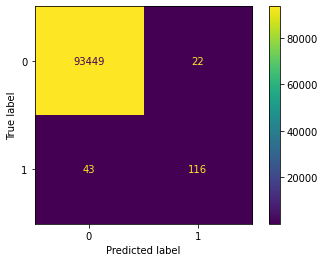

accuracy = 0.9993, sensitivity = 0.7296, specificity = 0.9998


In [63]:
y_pred_anova = computeMLP(
    X_train_anova, X_test_anova, y_train_anova, hidden_layer_sizes=(34,34))

accuracy, sensitivity, specificity = analyse(y_test_anova, y_pred_anova, True)

#### PCA

In [80]:
from sklearn.decomposition import PCA
r = range(5,15)
components_sensitivities = []
components_specificities = []
for value in r:
    pca = PCA(n_components=value, random_state=0)
    pca.fit(X)

    X_pca = pd.DataFrame(pca.transform(X))

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_pca, y, random_state=0, test_size=0.2)

    y_pred_pca = computeMLP(
        X_train_pca, X_test_pca, y_train_pca, hidden_layer_sizes=(34,34))

    accuracy, sensitivity, specificity = analyse(y_test_pca, y_pred_pca, False)
    components_sensitivities.append(sensitivity)
    components_specificities.append(specificity)


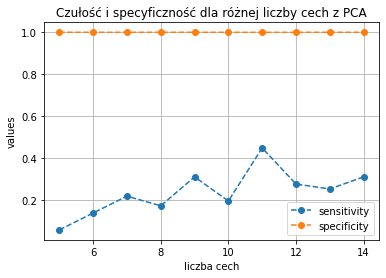

max sensitivity: 0.4482758620689655, max specificity: 0.9999294022132407


In [81]:
fig, ax = plt.subplots()

ax.plot(r, components_sensitivities, label="sensitivity", **plot_style)
ax.plot(r, components_specificities, label="specificity", **plot_style)

ax.set(xlabel='liczba cech', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby cech z PCA')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(components_sensitivities), max(components_specificities)))

##### Wnioski
* selekcja cech ANOVA, biorąc do analizy te, które mają największe znaczenie dla rozróżnienia klas, w wypadku MLP nie zmienia czułości, ale skraca drastycznie czas trenowania klasyfikatora
* selekcja cech nie zmniejsza specyficzności
* metoda PCA kompresująca informacje czyni klasyfikator bezużytecznym, ponieważ wyniki wariantu domyślnego bazują już na zbiorze danych zanonimizowanych metodą PCA. Cechami, które mogły zmienić rzutowanie danych są cechy `amount` i `time`, które nie zostały poddane anonimizacji, a w obecnej analizie poddane są transformacji. W analizie macierzy korelacji widać, że korelacja tych cech z innymi, w przeciwieństwie do pozostałych wartości, czasem nie jest bliska zeru.

### 4. Problem niezbalansowanych klas
Analiza bazuje na danych uzyskanych przy analizie drzewa decyzyjnego.

#### Oversampling - SMOTE

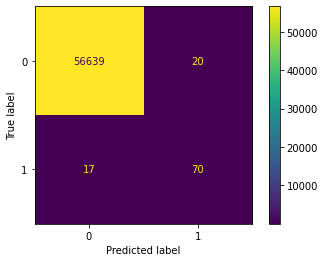

accuracy = 0.9993, sensitivity = 0.8046, specificity = 0.9996


(0.9993479716632009, 0.8045977011494253, 0.9996470110662031)

In [82]:
y_pred_smote = computeMLP(
    X_train_smote, X_test, y_train_smote, hidden_layer_sizes=(34,34))
analyse(y_test, y_pred_smote, True)

#### Oversampling - ADASYN

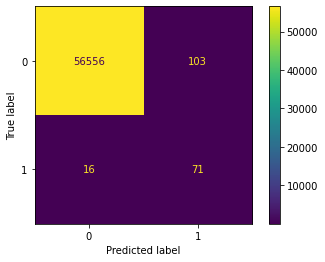

accuracy = 0.9979, sensitivity = 0.8161, specificity = 0.9982


(0.9979029358897543, 0.8160919540229885, 0.9981821069909458)

In [83]:
y_pred_adasyn = computeMLP(
    X_train_adasyn, X_test, y_train_adasyn, hidden_layer_sizes=(34,34))
analyse(y_test, y_pred_adasyn, True)


#### Undersampling - random

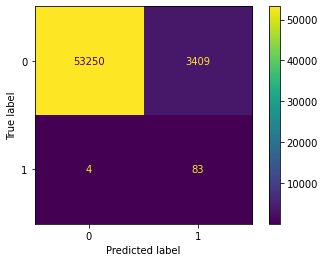

accuracy = 0.9399, sensitivity = 0.9540, specificity = 0.9398


(0.9398547915271561, 0.9540229885057471, 0.939833036234314)

In [84]:
y_pred_under = computeMLP(
    X_train_under, X_test, y_train_under, hidden_layer_sizes=(34,34))
analyse(y_test, y_pred_under, True)

##### Wnioski
* Oversampling z użyciem algorytmu SMOTE - syntezy nowych próbek - poprawie czułość do ok. 81% względem wariantu standardowego
* Oversampling z użyciem algorytmu ADASYN - syntezy nowych próbek - poprawie czułość do ok. 81% względem wariantu standardowego
* Oversampling nie wpływa znacznie na specyficzność
* Undersampling znacząco zwiększa czułość koszten specyficzności. Wyniki jednak są lepsze niż w przypadku drzewa decyzyjnego


### 5. Niesymetryczne koszty błędów

Klasyfikator MLP z biblioteki scikit-learn nie ma zaimplementowanej funkcjonalności wagi klas.
Źródło: https://github.com/scikit-learn/scikit-learn/issues/9113

Kosztem błędów, w przypadku klasyfikatora MLP można sterować imlicite poprzez re-sampling zbioru danych treningowych, czego analiza została wykonana w części `4. Problem niezbalanzowanych klas`.

### 6. Składanie klasyfikatorów

##### Wariant podstawowy

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from helpers import analyse

r = [1,2,4,8,16,32]
sensitivities = []
specificities = []
for value in r:
    clf = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(34,34,)),
                            n_estimators=value, random_state=0, n_jobs=8,
                            max_samples=0.8, max_features=0.8).fit(X_train, y_train)
    y_pred = clf.predict(X_test);

    accuracy, sensitivity, specificity = analyse(y_test, y_pred, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

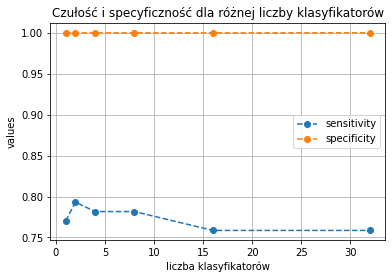

max sensitivity: 0.7931034482758621, max specificity: 0.9999117527665508


In [87]:
fig, ax = plt.subplots()

ax.plot(r, sensitivities, label="sensitivity", **plot_style)
ax.plot(r, specificities, label="specificity", **plot_style)

ax.set(xlabel='liczba klasyfikatorów', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby klasyfikatorów')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))

##### Wariant hybrydowy
Parametry klasyfikatora + undersampling + Bagging ensamble

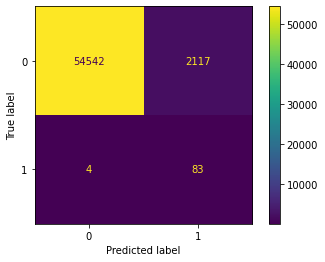

accuracy = 0.9626, sensitivity = 0.9540, specificity = 0.9626


In [95]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from helpers import analyse
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler


cc = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)

clf = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(34,34,),max_iter=500),
                        n_estimators=100, max_samples=0.8, max_features=0.8, random_state=0, n_jobs=8).fit(X_train_under, y_train_under)
y_pred_under = clf.predict(X_test);

accuracy, sensitivity, specificity = analyse(y_test, y_pred_under, True)


In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from helpers import analyse

r = range(2,9)
sensitivities = []
specificities = []
for value in r:
    cc = RandomUnderSampler(random_state=0)
    X_train_under, y_train_under = cc.fit_resample(X_train, y_train)

    clf = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(6*value,3*value,),max_iter=500),
                            n_estimators=value*10, max_samples=0.9, max_features=1.0, random_state=0, n_jobs=8).fit(X_train_under, y_train_under)
    y_pred_under = clf.predict(X_test);

    accuracy, sensitivity, specificity = analyse(y_test, y_pred_under, False)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

/home/damian_koper/.virtualenvs/aiedLab-2Ceq4bPp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


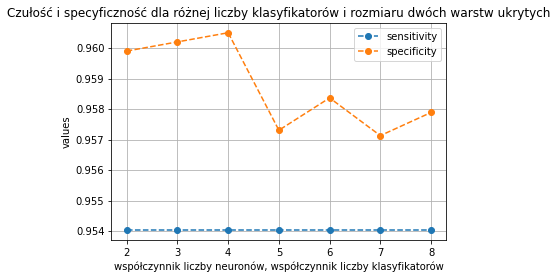

max sensitivity: 0.9540229885057471, max specificity: 0.960500538308124


In [97]:
fig, ax = plt.subplots()

ax.plot(r, sensitivities, label="sensitivity", **plot_style)
ax.plot(r, specificities, label="specificity", **plot_style)

ax.set(xlabel='współczynnik liczby neuronów, współczynnik liczby klasyfikatorów', ylabel='values',
       title='Czułość i specyficzność dla różnej liczby klasyfikatorów i rozmiaru dwóch warstw ukrytych')
ax.grid()
ax.legend()

plt.show()
print("max sensitivity: {}, max specificity: {}".format(
    max(sensitivities), max(specificities)))

#### Wnioski
* Implementacja biblioteki scikit-learn nie pozwala użyć algorytmu AdaBoost w przypadku MLP
* Używając tylko składania klasyfikatorów możmy osiągnąć znaczną poprawę czułości przy zachowaniu wysokiej specyficzności
* MLP nie jest tak podatne na wzrost czułości w składaniu klasyfikatorów jak drzewo decyzyjne
* Warianty hybrydowe, stosujące pozostałe techniki, wraz ze składaniem klasyfikatorów pozwalają osiągnąć lepsze rezultaty
* Składanie klasyfikatorów z undersamplingiem okazało się dawać taką samą czułość ale lepszą specyficzność niż sam undersampling

## Bonus - regresja logistyczna
Niepełna analiza jako chęć replikacji wyninków innych osób na tym samym zbiorze danych. <br>
https://www.kaggle.com/mariapushkareva/credit-card-fraud-detection-f1-score-0-86/notebook

### LogReg + SMOTE

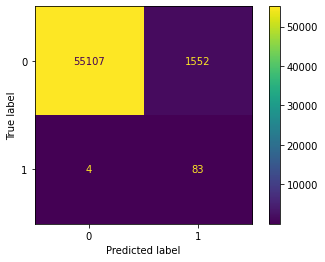

accuracy = 0.9726, sensitivity = 0.9540, specificity = 0.9726


In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from helpers import analyse

X_train_smote, y_train_smote = SMOTE(random_state=0).fit_resample(X_train, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg.predict(X_test)
a,se,sp = analyse(y_test, y_pred_smote, True)


### LogReg + Randum Undersampling

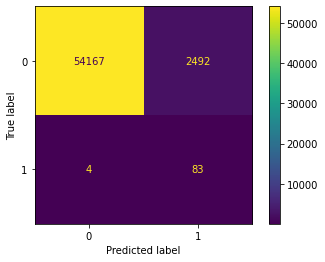

accuracy = 0.9560, sensitivity = 0.9540, specificity = 0.9560


In [92]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

cc = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)
y_pred_under = logreg.predict(X_test)
a,se,sp = analyse(y_test, y_pred_under, True)

#### Wnioski
* Regresja logistyczna w tym wypadku daje lepsze wyniki niż ten sam wariant dla drzewa decyzyjnego i MLP
* Regresja logistyczna jest mniej złożona obliczeniowo od pozostałych klasyfikatorów